# OrionKL test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
#import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

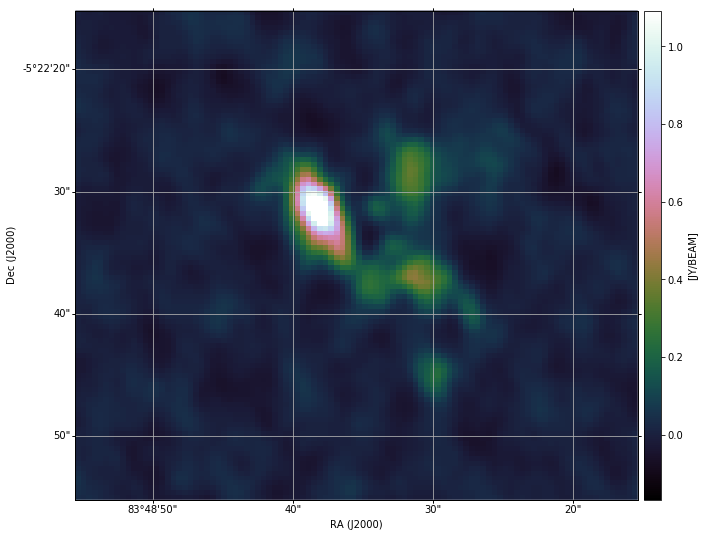

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

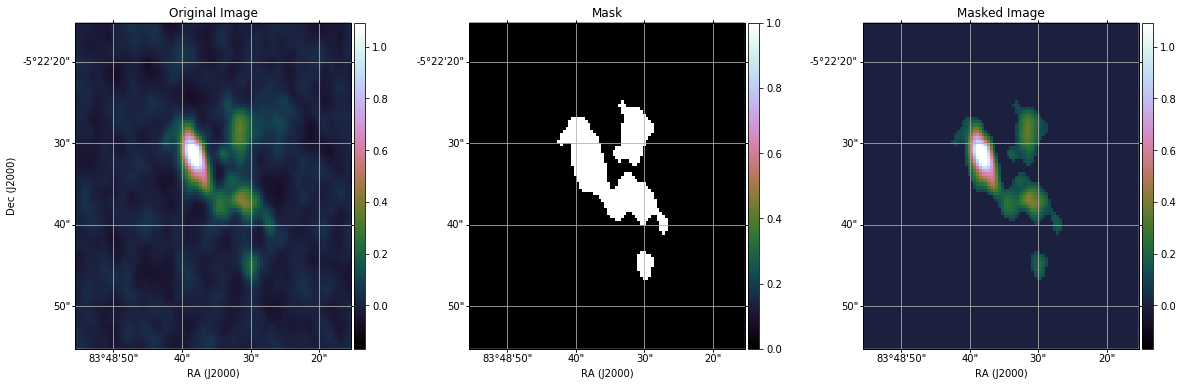

back_level:  0.10237737624469602


In [3]:
preprocessing(data, wcs)

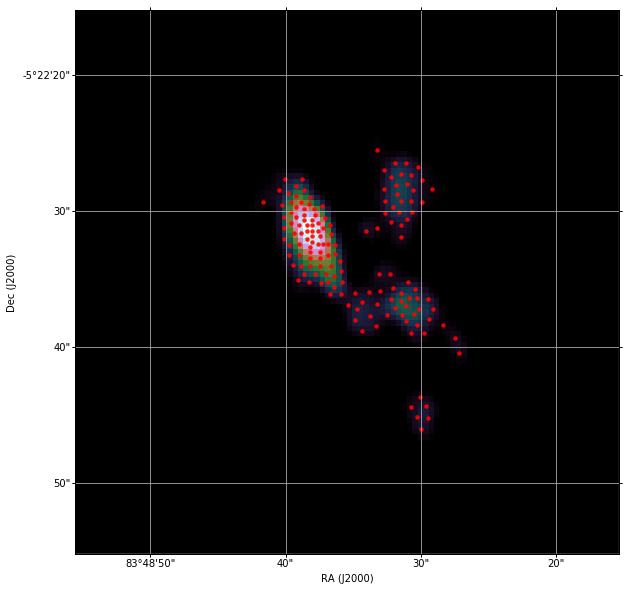

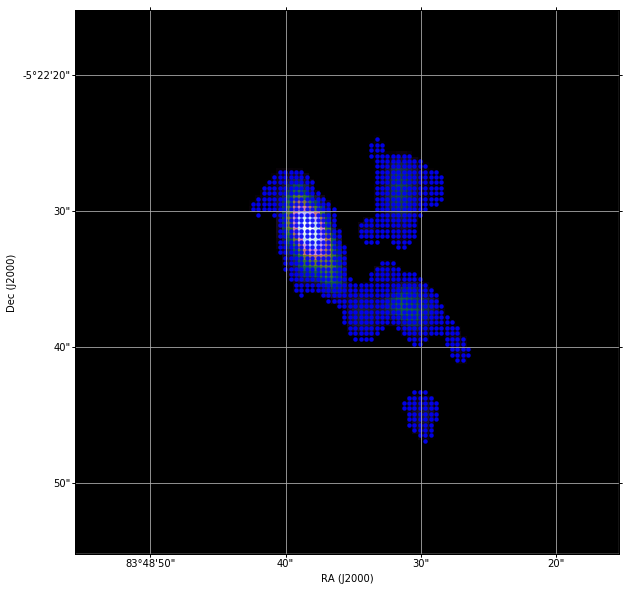

In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=150)

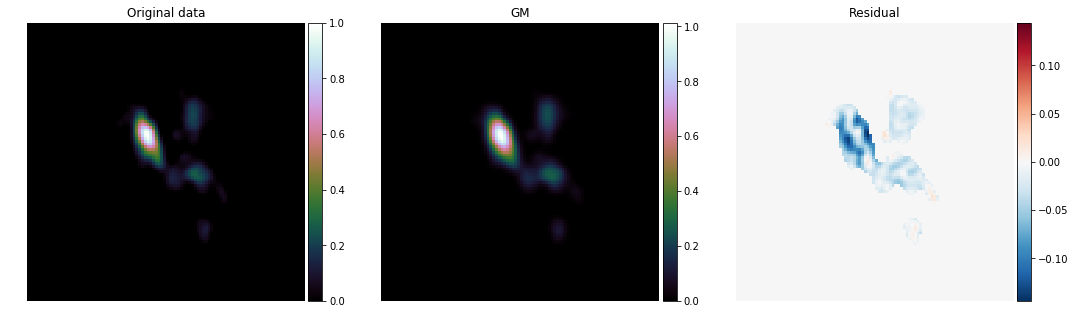

RESIDUAL STATS
RMS of residual: 0.012075973623253338
Inf norm of residual: 0.1440983454137041
Variance of residual: 0.00014000832850700264
Normalized flux addition: 0.2189002169148009
Normalized flux lost: 0.0032470223424081505


In [5]:
hdmc.get_residual_stats();

In [30]:
%%prun -s tottime -q -l 30 -T hdmc_m1_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'hdmc_m1_prof'. 


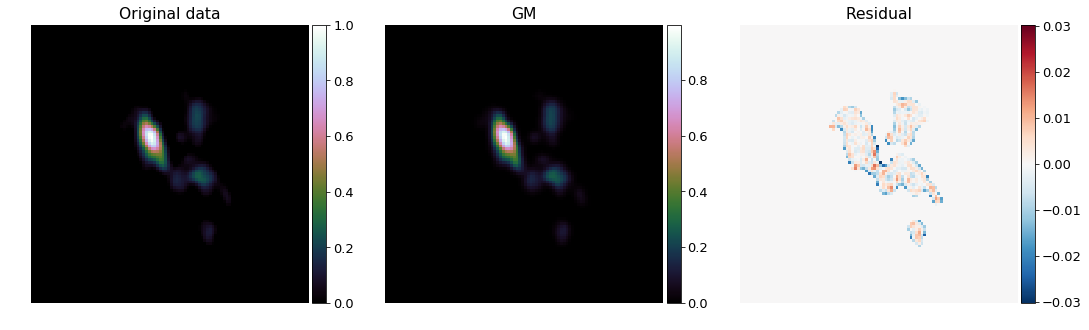

RESIDUAL STATS
RMS of residual: 0.0018783047868188563
Inf norm of residual: 0.030186306229829173
Variance of residual: 3.521353720294904e-06
Normalized flux addition: 0.020660745442196787
Normalized flux lost: 0.013357855698060347


In [31]:
hdmc.get_residual_stats();

In [32]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60200.
nfev: 60229
xtol: 1e-07
ftol: 1e-07


In [33]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 33.344751596450806


In [34]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.25245588219747406
sig variation:  0.008222434621098784


#### Profiling results

In [35]:
print(open('hdmc_m1_prof', 'r').read())

         4276447 function calls in 33.346 seconds

   Ordered by: internal time
   List reduced from 50 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    60231   12.564    0.000   12.564    0.000 {fgm_eval.gm_eval_trunc_thread}
        1   10.231   10.231   33.342   33.342 {built-in method scipy.optimize._minpack._lmdif}
   180693    2.688    0.000    5.076    0.000 necompiler.py:750(evaluate)
    60231    2.173    0.000    3.758    0.000 hdmclouds_v1.py:36(d1psi1)
    60231    1.318    0.000    1.318    0.000 utils.py:136(sig_mapping)
    60231    0.983    0.000   23.113    0.000 hdmclouds_v1.py:351(F)
    60231    0.685    0.000    0.685    0.000 {fgm_eval.gm_eval}
   180693    0.625    0.000    1.027    0.000 necompiler.py:725(getArguments)
   180693    0.555    0.000    0.743    0.000 necompiler.py:534(getContext)
   361388    0.212    0.000    0.212    0.000 {built-in method numpy.core.multiarray.array}
    60232    0.207   

***
#### Second try increasing `n_center`

/users/mavillan/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


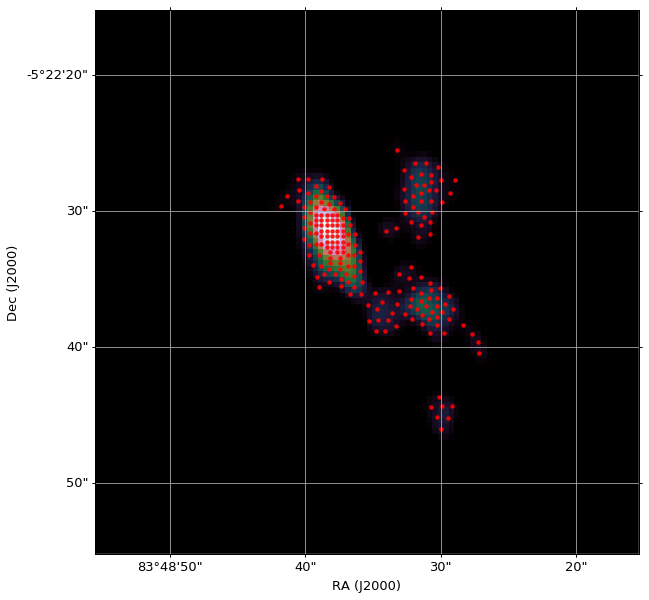

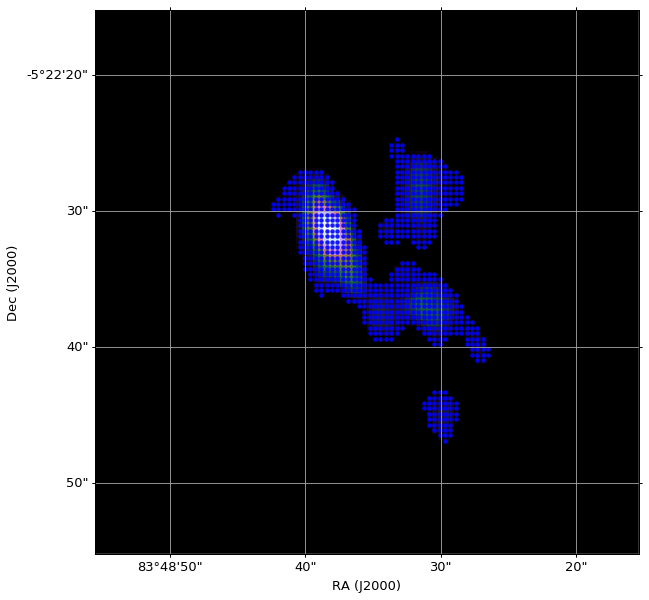

In [43]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=200)
hdmc.build_gmr()

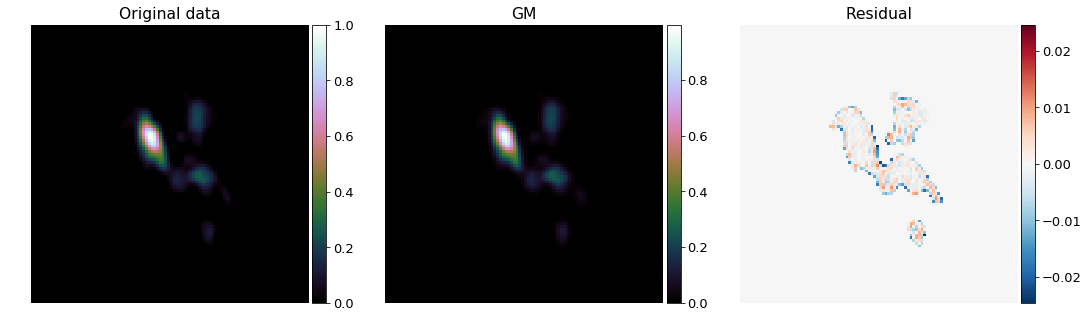

RESIDUAL STATS
RMS of residual: 0.0016421036653138763
Inf norm of residual: 0.024653068638270617
Variance of residual: 2.6921051322964493e-06
Normalized flux addition: 0.017501259132392467
Normalized flux lost: 0.011572596820724168


In [47]:
hdmc.get_residual_stats();

In [48]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80200.
nfev: 80230
xtol: 1e-07
ftol: 1e-07


In [49]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 50.50882053375244
